<a href="https://colab.research.google.com/github/dhyannn/ML_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time
import threading
import plotly.express as px

In [3]:
water=pd.read_csv('/content/water_potability.csv')

In [4]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
water['Potability'].unique()

array([0, 1])

In [7]:
water.shape

(3276, 10)

In [8]:
water.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [10]:
water.fillna(water.mean(), inplace=True)

In [11]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
count= water['Potability'].value_counts()
count

0    1998
1    1278
Name: Potability, dtype: int64

Text(0.5, 1.0, 'percentage of potability')

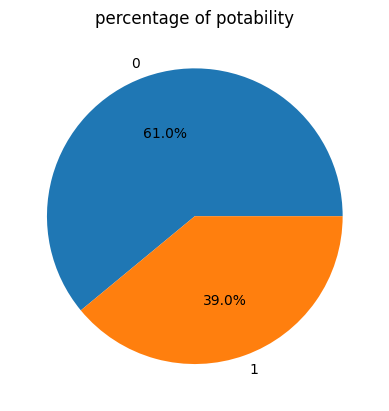

In [14]:
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('percentage of potability')
#0-not potable
#1-potable

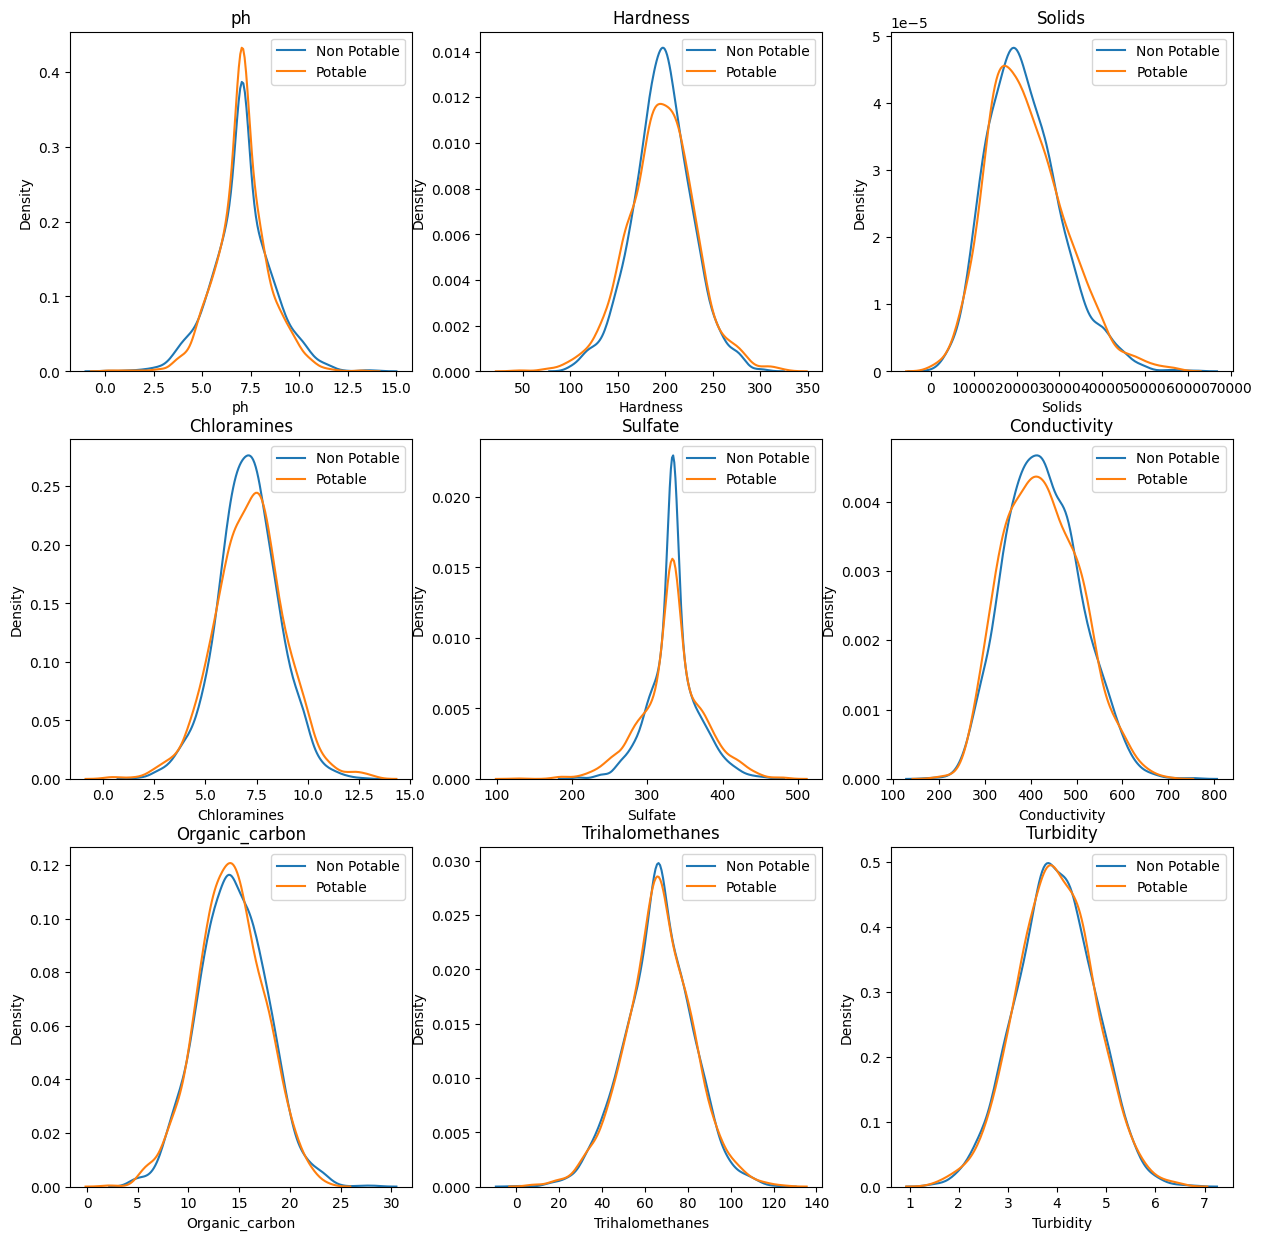

In [15]:
non_potable = water.query("Potability == 0")
potable = water.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(water.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.show()

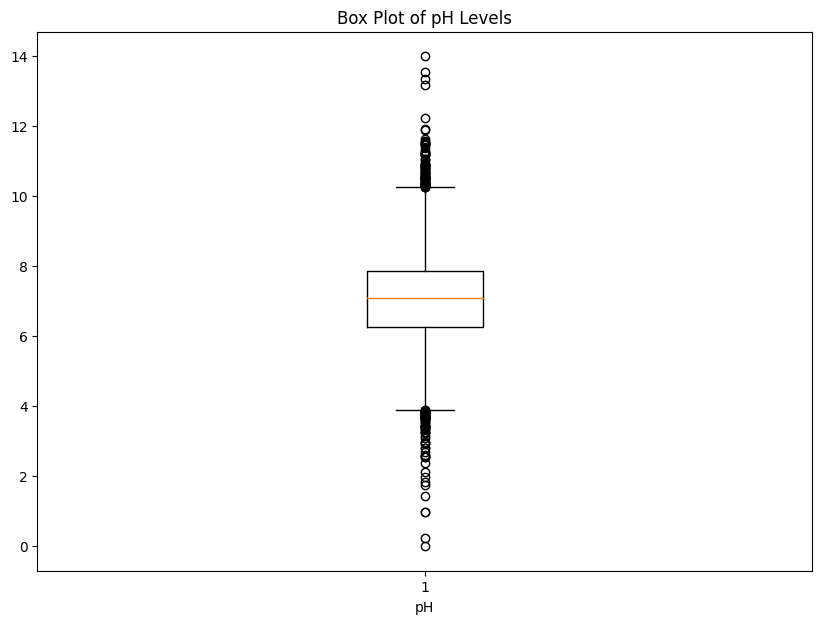

In [17]:
plt.figure(figsize=(10, 7))
plt.boxplot(water['ph'])
plt.title('Box Plot of pH Levels')
plt.xlabel('pH')
plt.show()

In [19]:
fig = px.box(water, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()